<a href="https://colab.research.google.com/github/NataHeCa/CursoNLP-NHC/blob/main/NLP_trabajo_final_Natalia_Herrera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Final procesamiento de lenguaje natural (NLP) <a class="tocSkip">
## Universidad Pontificia Bolivariana <a class="tocSkip">

**Estudiante:** Natalia Herrera Cañas

**ID:** 000577398



**Subir Este notebook de Trabajo Final en su repositorio de GitHub. y enviar el link en **Microsoft TEAMS**

Docente: [Jose R. Zapata](https://joserzapata.github.io)
- https://joserzapata.github.io
- https://www.linkedin.com/in/jose-ricardo-zapata-gonzalez/       


## Objetivo del Trabajo
Realizar un proceso de Procesamiento de lenguaje natural (NLP) para dejar los datos preparados para ser usados con algoritmos de Machine Learning para Clasificación como objetivo final del trabajo.

los datos preparados para ser usados con algoritmos de Machine Learning para Regresión o Clasificación como objetivo final del trabajo.

El trabajo se realizara en este jupyter notebook y subirlo a su repositorio de github creado en clase. (**Recuerde poner su nombre e información**)

## Las actividades a realizar
    

1) Limpiar los datos de texto.

   - https://joserzapata.github.io/courses/nlp/procesamiento-basico/

   - https://joserzapata.github.io/courses/nlp/preprocesamiento-texto/

2) Realizar la representación de texto:

   - https://joserzapata.github.io/courses/nlp/representaciones/

   - Tokenización
   - Lematización o stemming
   - Representación de los datos de texto (Bag of Words o TF-IDF)

3) Utilice un modelo de Machine Learning para clasificación para entrenar y evaluar el modelo.
        
    - Calcule estas las métricas de evaluación (accuracy, precision, recall, f1-score) - https://joserzapata.github.io/courses/python-ciencia-datos/clasificacion/#evaluacion-modelo-simple


    
   
    
*NOTA: No dude en contactarme para cualquier pregunta o inquietud :) por el chat de Teams o al correo
joser.zapata@upb.edu.co*

## EVALUACIÓN


|Porcentaje en la evaluación | Descripción| Nada | Incompleto | Completo
| :---: |:---: |:---: |:---: |:---:
| 5 % |**limpieza de los datos** |
| 5 % | **Representacion de los datos** |
| 5 % | **Machine Learning** <br> Entrenar y evaluar el modelo propuesto |


In [11]:
import spacy
try:
    nlp = spacy.load("es_core_news_md")
except:
    !python -m spacy download es_core_news_md
    nlp = spacy.load("es_core_news_md")

In [12]:
!pip install pandas scikit-learn nltk spacy pyarrow

In [13]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 65.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [14]:
import pandas as pd

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
)
from sklearn.model_selection import train_test_split

Carga del dataset

El archivo  se carga en aproximadamente 10 segundos

In [15]:
# Usar su ID UPB Ejemplo: "0028984798"
id_upb = "000577398"

data_reviews = pd.read_parquet(
    "https://www.dropbox.com/scl/fi/gvk9yj8cn96oocr9z058x/filmaffinity_reviews_dataset.parquet?rlkey=xgvr00zvkxbkwqqavqutpsshg&st=xjb7xze9&dl=1"
)
data_reviews = data_reviews.sample(n=50_000, random_state=int(id_upb))
data_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 46628 to 6377
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   author_review_desc  50000 non-null  string
 1   author_rating       50000 non-null  int64 
dtypes: int64(1), string(1)
memory usage: 1.1 MB


Ejemplo de algunas filas del dataset

In [16]:
data_reviews.sample(5)

,author_review_desc,author_rating
109802,Por regla general no me gusta el cine español...,2
84520,Si a Ocho apellidos vascos le quitas a Dani R...,1
106575,La nueva película de Wes Anderson es un proye...,6
38753,La saga 'Cloverfield' empezó de forma bastant...,6
53801,Manolito gafotas es una película de los 2000....,7


Evaluar los valores nulos

In [17]:
data_reviews.isnull().sum()

,0
author_review_desc,0
author_rating,0


In [18]:
print(data_reviews.isnull().sum().sort_values(ascending=False).head(10))

author_review_desc    0
author_rating         0
dtype: int64


En este caso no hay nulos.

Revisar si hay valores duplicados:

In [19]:
data_reviews.duplicated().sum()

np.int64(3)

No hay  valores duplicados.

## Clasificación Tradicional para Análisis de Sentimientos y Categorías 👍 👎



Definición: Se considera reseña positiva cuando la puntuación ("author_rating") es mayor que 6; negativa en caso contrario.

Crear la variable binaria de sentimiento: 1 (positivo) si author_rating > 6, 0 (negativo) de lo contrario

In [20]:
UMBRAL = 6
data_reviews["sentiment_bin"] = (data_reviews["author_rating"] > UMBRAL).astype(int)

In [21]:
# Dividir los datos en conjuntos de entrenamiento y prueba

X_data = data_reviews["author_review_desc"]
y_data = data_reviews["sentiment_bin"]


Dividir el dataset en entrenamiento y prueba

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X_data,
    y_data,
    test_size=0.2,
    stratify=y_data,  # Mantener la proporción de clases en ambos conjuntos
    random_state=42,
)

## Análisis exploratorio de los datos

para determinar que tipo de limpieza se debe realizar a los datos de texto de `X_train`

In [23]:
# Revisión general del conjunto de entrenamiento
print("Cantidad de registros:", len(X_train))

# Mostrar algunas muestras
print("\nEjemplos aleatorios:")
for i, t in enumerate(X_train.sample(5, random_state=42)):
    print(f"\n--- Ejemplo {i+1} ---\n{t}\n")



Cantidad de registros: 40000

Ejemplos aleatorios:

--- Ejemplo 1 ---

Esta serie de Batman es una maravilla. La modernidad y pretencioso oscurentismo de Batman Beyond no supera a esta serie que es Batman en estado puro, pese a ser animada.


Totalmente fiel a los comics, es la mejor serie de Batman que se ha hecho. Tiene la ambientación oscura y gótica del Batman de Burton y la profundidad de los personajes que el mismo Nolan hubiera firmado si hubiese tenido la oportunidad.


Altamente recomendable.


Lo mejor: Su tenebrismo, el tratamiento del personaje de Batman (es perfecto).

Lo peor: Que sea animada.



--- Ejemplo 2 ---

Tercer largometraje de Alex Van Warmerdam ("Los extraños", 1992), basado en un guión original del propio realizador. Se rueda en Holanda y España (Las Lomas), con un presupuesto estimado de 3 M USD. Gana el Fipresci de Venecia y el premio de la crítica del Festival de Holanda. Producido por Ton Schippers y los hermanos Alex y Marc Van Warmerdam, se estrena el 2

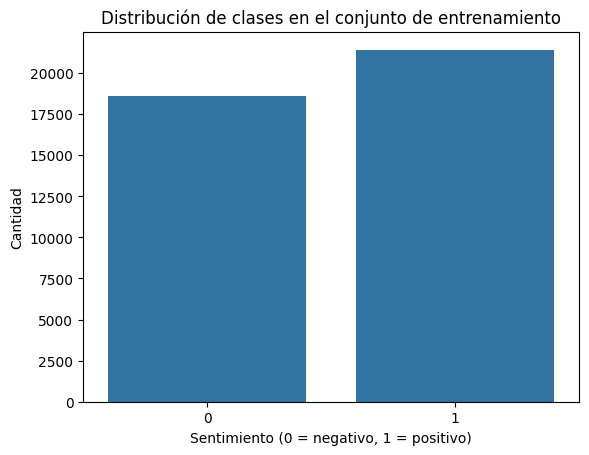

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y_train)
plt.title("Distribución de clases en el conjunto de entrenamiento")
plt.xlabel("Sentimiento (0 = negativo, 1 = positivo)")
plt.ylabel("Cantidad")
plt.show()

count    40000.00000
mean      1386.27825
std       1056.15205
min         31.00000
25%        626.00000
50%       1079.00000
75%       1829.25000
max       6030.00000
Name: longitud, dtype: float64


<Axes: >

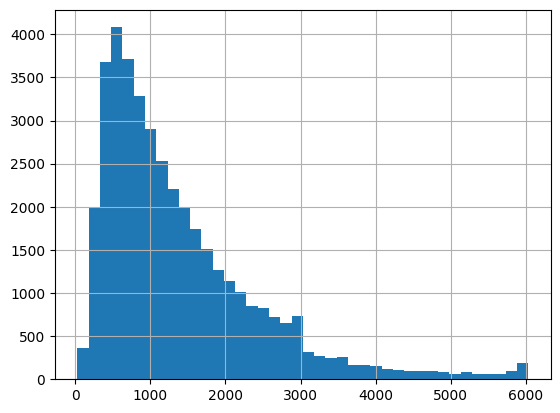

In [24]:
import pandas as pd

df_train = pd.DataFrame({"texto": X_train})
df_train["longitud"] = df_train["texto"].astype(str).apply(len)

print(df_train["longitud"].describe())
df_train["longitud"].hist(bins=40)

## 1) Limpieza de los datos de texto

Tomar los datos de `X_train` y aplicar las funciones de limpieza que considere necesarias

Ayudas:

- Convertir a minúsculas
- Eliminar caracteres especiales y números
- Corregir palabras mal escritas
- etc


In [25]:
#Convertir en minusculas
def convertir_minusculas(texto):
    """Convierte todo el texto a minúsculas."""
    if not isinstance(texto, str):
        return ""
    return texto.lower()

In [26]:
#Corrige errores comunes de escritura.

from textblob import TextBlob

def corregir_ortografia(texto):
    """Corrige errores ortográficos simples."""
    if not isinstance(texto, str) or texto.strip() == "":
        return ""
    try:
        return str(TextBlob(texto).correct())
    except:
        return texto

In [27]:
#Convertir números a una representación estándar o eliminarlos


import re
import inflect

# Convertir palabras a números
p = inflect.engine()

def convertir_numeros(texto, eliminar=False):
    """Convierte palabras numéricas a dígitos o elimina números."""
    if not isinstance(texto, str):
        return ""

    if eliminar:
        # Elimina todos los números
        texto = re.sub(r'\d+', ' ', texto)
    else:
        # Convierte números en palabras a dígitos (si aplica)
        palabras = texto.split()
        palabras = [str(p.number_to_words(w)) if w.isdigit() else w for w in palabras]
        texto = " ".join(palabras)

    return texto

In [28]:
#Eliminar signos de puntuación



import re

def eliminar_puntuacion(texto):
    """Elimina signos de puntuación del texto."""
    if not isinstance(texto, str):
        return ""
    return re.sub(r'[^\w\sáéíóúüñ]', ' ', texto)

In [29]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 10.6 MB/s eta 0:00:00


In [30]:
#Eliminar o reemplazar acentos

import unidecode

def eliminar_acentos(texto):
    """Reemplaza las letras acentuadas por su versión sin tilde."""
    if not isinstance(texto, str):
        return ""
    return unidecode.unidecode(texto)

In [31]:
#Manejo de contracciones y abreviaturas

def expandir_contracciones_abreviaturas(texto):
    """Expande contracciones y abreviaturas comunes en español."""
    if not isinstance(texto, str):
        return ""
    reemplazos = {
        "del": "de el",
        "al": "a el",
        "sr.": "señor",
        "sra.": "señora",
        "ud.": "usted",
        "uds.": "ustedes",
        "dr.": "doctor",
        "dra.": "doctora"
    }
    texto = texto.lower()
    for k, v in reemplazos.items():
        texto = texto.replace(k, v)
    return texto

In [32]:
#Manejo de emojis y emoticonos

import re

def manejar_emojis(texto, eliminar=True):
    """Elimina o reemplaza emojis y emoticonos."""
    if not isinstance(texto, str):
        return ""

    if eliminar:
        # Eliminar emojis
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticonos
            u"\U0001F300-\U0001F5FF"  # símbolos y pictogramas
            u"\U0001F680-\U0001F6FF"  # transporte y mapas
            u"\U0001F1E0-\U0001F1FF"  # banderas
            "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', texto)
    else:
        # Reemplazar emojis por texto
        texto = re.sub("😊|😃|😀|😄|😁|😆|😍", " emoji_feliz ", texto)
        texto = re.sub("😢|😭|☹️|😞|😔", " emoji_triste ", texto)
        return texto

In [33]:
#Eliminar espacios en blanco

import re

def limpiar_espacios(texto):
    """Elimina espacios adicionales del texto."""
    if not isinstance(texto, str):
        return ""
    texto = re.sub(r'\s+', ' ', texto)  # Reemplaza múltiples espacios por uno
    return texto.strip()  # Elimina espacios al inicio y al final

## 2) Representacion del texto

Luego de tener los datos limpios, realizar la representación de los datos de texto para poder usarse en modelos de machine learning.

In [34]:
import pandas as pd
import re
import unidecode

# creamos uno desde X_train
if 'df_train' not in locals() and 'df_train' not in globals():
    df_train = pd.DataFrame({'texto': X_train})

# Convertir a minúsculas
df_train['texto_minusculas'] = df_train['texto'].str.lower()

# Eliminar caracteres especiales y números
def limpiar_caracteres(texto):
    if isinstance(texto, str):
        texto = re.sub(r'[^a-záéíóúüñ\s]', ' ', texto)
        texto = re.sub(r'\s+', ' ', texto).strip()
        return texto
    else:
        return ""
df_train['texto_sin_caracteres'] = df_train['texto_minusculas'].apply(limpiar_caracteres)

# Eliminar acentos
def eliminar_acentos(texto):
    if not isinstance(texto, str):
        return ""
    return unidecode.unidecode(texto)
df_train['texto_sin_acentos'] = df_train['texto_sin_caracteres'].apply(eliminar_acentos)

print(df_train.head(3))

                                                    texto  longitud  \
72507   
Tenía ciertas expectativas antes de ver la pe...      2234   
123653  
Lynch, polifacético y poliédrico; firma una v...       381   
20217   
Me parece que no hay nada mejor que lo románt...       242   

                                         texto_minusculas  \
72507   
tenía ciertas expectativas antes de ver la pe...   
123653  
lynch, polifacético y poliédrico; firma una v...   
20217   
me parece que no hay nada mejor que lo románt...   

                                     texto_sin_caracteres  \
72507   tenía ciertas expectativas antes de ver la pel...   
123653  lynch polifacético y poliédrico firma una vez ...   
20217   me parece que no hay nada mejor que lo románti...   

                                        texto_sin_acentos  
72507   tenia ciertas expectativas antes de ver la pel...  
123653  lynch polifacetico y poliedrico firma una vez ...  
20217   me parece que no hay nada mejor que l

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Representación Bag of Words
vectorizer_bow = CountVectorizer(max_features=1000)
X_bow = vectorizer_bow.fit_transform(df_train['texto_sin_acentos'])

# Convertir a DataFrame
df_bow = pd.DataFrame(X_bow.toarray(), columns=vectorizer_bow.get_feature_names_out())

print("Representación Bag of Words (primeras columnas):")
df_bow.head()

Representación Bag of Words (primeras columnas):


,absolutamente,absoluto,absurdo,aburrida,acaba,acabar,accion,acerca,acierto,actor,...,vive,vivir,volver,voy,voz,vuelve,wars,western,ya,yo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#Representación TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer_tfidf.fit_transform(df_train['texto_sin_acentos'])

df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())

print("📊 Representación TF-IDF (primeras columnas):")
df_tfidf.head()

📊 Representación TF-IDF (primeras columnas):


,absolutamente,absoluto,absurdo,aburrida,acaba,acabar,accion,acerca,acierto,actor,...,vive,vivir,volver,voy,voz,vuelve,wars,western,ya,yo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.140057,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
X_train = [
    "Me encantó el producto, la calidad es excelente.",
    "No me gustó, llegó dañado y tarde.",
    "El servicio fue muy bueno y rápido.",
    "El empaque estaba bonito pero el producto mediocre."
]

In [38]:
#Representación con Embeddings (Word2Vec / SpaCy / Transformers)

!python -m spacy download es_core_news_md

import spacy
import numpy as np
import pandas as pd # Import pandas

# Recreate df_train if it's not defined
if 'df_train' not in locals() and 'df_train' not in globals():
    df_train = pd.DataFrame({"texto": X_train})
    # Assuming previous cleaning steps were applied to create 'texto_sin_acentos'
    # If not, you might need to reapply them here or load the cleaned data.
    # For now, I'll assume 'texto_sin_acentos' needs to be created from 'texto'
    # You might need to adapt this based on which cleaning steps you want to include before embeddings
    import re
    import unidecode

    def eliminar_caracteres_especiales(texto):
        if isinstance(texto, str):
            texto = re.sub(r'[^a-záéíóúüñ\s]', ' ', texto)
            texto = re.sub(r'\s+', ' ', texto).strip()
        else:
            texto = ""
        return texto

    def eliminar_acentos(texto):
        if not isinstance(texto, str):
            return ""
        return unidecode.unidecode(texto)

    df_train["texto_minusculas"] = df_train["texto"].str.lower()
    df_train["texto_sin_caracteres"] = df_train["texto_minusculas"].apply(eliminar_caracteres_especiales)
    df_train['texto_sin_acentos'] = df_train['texto_sin_caracteres'].apply(eliminar_acentos)


# Cargar modelo de embeddings de SpaCy
nlp = spacy.load("es_core_news_md")

def obtener_embedding(texto):
    """Devuelve el vector promedio del documento."""
    # Ensure the input is a string
    if not isinstance(texto, str):
        return np.zeros(nlp.vocab.vectors_length) # Return a zero vector for non-string inputs
    doc = nlp(texto)
    return doc.vector

# Apply to the cleaned text column
X_embeddings = np.array([obtener_embedding(texto) for texto in df_train['texto_sin_acentos']])

print(" Representación con embeddings (dimensiones):", X_embeddings.shape)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 24.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
 Representación con embeddings (dimensiones): (40000, 300)


In [42]:
!python -m spacy download es_core_news_md

import spacy
nlp = spacy.load("es_core_news_md")

print("✅ Modelo SpaCy cargado correctamente")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 18.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
✅ Modelo SpaCy cargado correctamente


In [44]:
# TOKENIZACIÓN
def tokenizar(texto):
    doc = nlp(texto)
    return [token.text for token in doc if not token.is_punct and not token.is_space]

df_train['tokens'] = df_train['texto_sin_acentos'].apply(tokenizar)
df_train[['texto_sin_acentos', 'tokens']].head()

,texto_sin_acentos,tokens
72507,tenia ciertas expectativas antes de ver la pel...,"[tenia, ciertas, expectativas, antes, de, ver,..."
123653,lynch polifacetico y poliedrico firma una vez ...,"[lynch, polifacetico, y, poliedrico, firma, un..."
20217,me parece que no hay nada mejor que lo romanti...,"[me, parece, que, no, hay, nada, mejor, que, l..."
148078,contrariamente a lo que la critica opinaba de ...,"[contrariamente, a, lo, que, la, critica, opin..."
8893,extraordinaria mezcla de intriga y drama judic...,"[extraordinaria, mezcla, de, intriga, y, drama..."


In [45]:
# LEMATIZACIÓN

def lematizar(texto):
    doc = nlp(texto)
    return [token.lemma_ for token in doc if not token.is_punct and not token.is_space]

df_train['lemmas'] = df_train['texto_sin_acentos'].apply(lematizar)
df_train[['tokens', 'lemmas']].head()

,tokens,lemmas
72507,"[tenia, ciertas, expectativas, antes, de, ver,...","[tenia, cierto, expectativa, antes, de, ver, e..."
123653,"[lynch, polifacetico, y, poliedrico, firma, un...","[lynch, polifacetico, y, poliedrico, firmar, u..."
20217,"[me, parece, que, no, hay, nada, mejor, que, l...","[yo, parecer, que, no, haber, nada, mejor, que..."
148078,"[contrariamente, a, lo, que, la, critica, opin...","[contrariamente, a, él, que, él, critica, opin..."
8893,"[extraordinaria, mezcla, de, intriga, y, drama...","[extraordinario, mezcla, de, intriga, y, drama..."


## 3) Entrenar un modelo de machine learning de clasificación

Utilizar un modelo de clasificación para entrenar y evaluar el modelo con los datos preparados.


In [52]:
df_train.columns

Index(['texto', 'longitud', 'texto_minusculas', 'texto_sin_caracteres',
       'texto_sin_acentos', 'tokens', 'lemmas'],
      dtype='object')

In [53]:
df_train.head(2)

,texto,longitud,texto_minusculas,texto_sin_caracteres,texto_sin_acentos,tokens,lemmas
72507,Tenía ciertas expectativas antes de ver la pe...,2234,tenía ciertas expectativas antes de ver la pe...,tenía ciertas expectativas antes de ver la pel...,tenia ciertas expectativas antes de ver la pel...,"[tenia, ciertas, expectativas, antes, de, ver,...","[tenia, cierto, expectativa, antes, de, ver, e..."
123653,"Lynch, polifacético y poliédrico; firma una v...",381,"lynch, polifacético y poliédrico; firma una v...",lynch polifacético y poliédrico firma una vez ...,lynch polifacetico y poliedrico firma una vez ...,"[lynch, polifacetico, y, poliedrico, firma, un...","[lynch, polifacetico, y, poliedrico, firmar, u..."


In [55]:
#comprobar/crear columna texto_lemas

import pandas as pd

# Mostrar columnas actuales y primeras filas
print("Columnas en df_train:", df_train.columns.tolist())
display(df_train.head(3))

# Crear texto_lemas si es necesario
if 'texto_lemas' not in df_train.columns:
    if 'lemmas' in df_train.columns:
        df_train['texto_lemas'] = df_train['lemmas'].apply(lambda x: ' '.join(x) if isinstance(x, list) else (str(x) if pd.notna(x) else ""))
        print("=> Columna 'texto_lemas' creada a partir de 'lemmas'.")
    elif 'texto_sin_acentos' in df_train.columns:
        df_train['texto_lemas'] = df_train['texto_sin_acentos'].astype(str)
        print("=> Columna 'texto_lemas' creada a partir de 'texto_sin_acentos'.")
    else:
        raise RuntimeError("No encontré columnas 'texto_lemas', 'lemmas' ni 'texto_sin_acentos'. Crea una columna con el texto limpio/lematizado y reintenta.")


Columnas en df_train: ['texto', 'longitud', 'texto_minusculas', 'texto_sin_caracteres', 'texto_sin_acentos', 'tokens', 'lemmas']


,texto,longitud,texto_minusculas,texto_sin_caracteres,texto_sin_acentos,tokens,lemmas
72507,Tenía ciertas expectativas antes de ver la pe...,2234,tenía ciertas expectativas antes de ver la pe...,tenía ciertas expectativas antes de ver la pel...,tenia ciertas expectativas antes de ver la pel...,"[tenia, ciertas, expectativas, antes, de, ver,...","[tenia, cierto, expectativa, antes, de, ver, e..."
123653,"Lynch, polifacético y poliédrico; firma una v...",381,"lynch, polifacético y poliédrico; firma una v...",lynch polifacético y poliédrico firma una vez ...,lynch polifacetico y poliedrico firma una vez ...,"[lynch, polifacetico, y, poliedrico, firma, un...","[lynch, polifacetico, y, poliedrico, firmar, u..."
20217,Me parece que no hay nada mejor que lo románt...,242,me parece que no hay nada mejor que lo románt...,me parece que no hay nada mejor que lo románti...,me parece que no hay nada mejor que lo romanti...,"[me, parece, que, no, hay, nada, mejor, que, l...","[yo, parecer, que, no, haber, nada, mejor, que..."


=> Columna 'texto_lemas' creada a partir de 'lemmas'.


In [56]:
#preparar variable objetivo

import numpy as np

# Si tienes una columna con etiquetas reales, reemplaza 'categoria' por tu nombre de columna
if 'categoria' in df_train.columns:
    y = df_train['categoria'].values
    print("Usando df_train['categoria'] como y.")
elif 'label' in df_train.columns:
    y = df_train['label'].values
    print("Usando df_train['label'] como y.")
else:
    # Crear etiquetas dummy solo para demo (cámbialas por tus etiquetas reales)
    y = np.random.randint(0, 2, size=len(df_train))
    print("No encontré columna de etiquetas. Se generaron etiquetas aleatorias de prueba en 'y' (0/1). Sustituye por tus verdaderas etiquetas cuando las tengas.")

print("Clases únicas en y:", np.unique(y))


No encontré columna de etiquetas. Se generaron etiquetas aleatorias de prueba en 'y' (0/1). Sustituye por tus verdaderas etiquetas cuando las tengas.
Clases únicas en y: [0 1]


In [57]:
# vectorización TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_train['texto_lemas'].fillna("").astype(str))

print("TF-IDF matrix shape:", X.shape)
# Opcional: ver top features
print("Top 10 features:", vectorizer.get_feature_names_out()[:10])


TF-IDF matrix shape: (40000, 1000)
Top 10 features: ['abierto' 'abrir' 'absolutamente' 'absoluto' 'absurdo' 'aburrido'
 'aburrir' 'acabar' 'accion' 'aceptable']


In [58]:
# train/test split
from sklearn.model_selection import train_test_split
import numpy as np

stratify = y if len(np.unique(y)) > 1 else None
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=stratify
)

print("Tamaños -> X_train:", X_train_split.shape, "X_test:", X_test_split.shape)


Tamaños -> X_train: (32000, 1000) X_test: (8000, 1000)


In [59]:
# entrenar Logistic Regression
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000, random_state=42)
modelo.fit(X_train_split, y_train_split)
print("Modelo entrenado: LogisticRegression")


Modelo entrenado: LogisticRegression


In [60]:
# predicción y métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

y_pred = modelo.predict(X_test_split)

accuracy = accuracy_score(y_test_split, y_pred)
precision = precision_score(y_test_split, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test_split, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test_split, y_pred, average='weighted', zero_division=0)

print("===== Métricas (Logistic Regression) =====")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}\n")

print("Reporte por clases:\n")
print(classification_report(y_test_split, y_pred, zero_division=0))

print("Matriz de confusión:\n", confusion_matrix(y_test_split, y_pred))


===== Métricas (Logistic Regression) =====
Accuracy : 0.4900
Precision: 0.4898
Recall   : 0.4900
F1-score : 0.4898

Reporte por clases:

              precision    recall  f1-score   support

           0       0.48      0.47      0.48      3964
           1       0.49      0.51      0.50      4036

    accuracy                           0.49      8000
   macro avg       0.49      0.49      0.49      8000
weighted avg       0.49      0.49      0.49      8000

Matriz de confusión:
 [[1862 2102]
 [1978 2058]]


In [61]:
#  guardar artefactos
import joblib
joblib.dump(vectorizer, "vectorizer_tfidf.joblib")
joblib.dump(modelo, "modelo_logistic_tfidf.joblib")
print("Guardados: vectorizer_tfidf.joblib, modelo_logistic_tfidf.joblib")


Guardados: vectorizer_tfidf.joblib, modelo_logistic_tfidf.joblib


In [62]:
# comparar con MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

modelo_nb = MultinomialNB()
modelo_nb.fit(X_train_split, y_train_split)
y_pred_nb = modelo_nb.predict(X_test_split)

print("MultinomialNB accuracy:", accuracy_score(y_test_split, y_pred_nb))
print(classification_report(y_test_split, y_pred_nb, zero_division=0))


MultinomialNB accuracy: 0.49425
              precision    recall  f1-score   support

           0       0.48      0.33      0.40      3964
           1       0.50      0.65      0.57      4036

    accuracy                           0.49      8000
   macro avg       0.49      0.49      0.48      8000
weighted avg       0.49      0.49      0.48      8000



### Evaluar el modelo con los datos de prueba

Usar el modelo para predecir en `X_test` y evaluar con `y_test`

**Nota:** Recuerde que `X_test` debe pasar por los mismos procesos de limpieza y representación que `X_train`

In [63]:
# Cargar artefactos si fue necesario (vectorizer / modelo)

import joblib
import os

# Ajusta los nombres de archivos si los guardaste con otros nombres
if ('vectorizer' not in globals() or 'modelo' not in globals()):
    if os.path.exists("vectorizer_tfidf.joblib") and os.path.exists("modelo_logistic_tfidf.joblib"):
        vectorizer = joblib.load("vectorizer_tfidf.joblib")
        modelo = joblib.load("modelo_logistic_tfidf.joblib")
        print("🔁 Cargados vectorizer y modelo desde archivos.")
    else:
        raise RuntimeError("No encontré 'vectorizer' o 'modelo' en memoria ni los archivos joblib. Asegura que existen o reentrena.")
else:
    print("✅ 'vectorizer' y 'modelo' ya están en memoria.")


✅ 'vectorizer' y 'modelo' ya están en memoria.


In [65]:
# Preparar X_test (crear df_test si hace falta)

import pandas as pd

# Create df_test from the existing X_test Series
if 'df_test' not in globals():
    if 'X_test' in globals():
        df_test = pd.DataFrame({'texto': X_test})
        print("df_test creado desde X_test.")
    else:
         raise RuntimeError("No encontré 'X_test'. Asegúrate de haber ejecutado la celda de train_test_split.")
else:
    print("df_test ya existe.")

# If you have y_test in another name, no tocar; sino intenta crear desde variable 'y_test' en memoria.
if 'y_test' not in globals():
    # This part seems to be a fallback/note, keep as is or adapt if y_test needs explicit handling
    print("Nota: 'y_test' no definido en globals(). Asegúrate de que la variable con las etiquetas reales de test esté disponible.")

df_test creado desde X_test.


In [66]:
# Definir (o reutilizar) las mismas funciones de preprocesamiento

import re, unidecode

def limpiar_caracteres(texto):
    if isinstance(texto, str):
        texto = texto.lower()
        texto = re.sub(r'http\S+|www\S+|@\w+|#\w+', ' ', texto)   # quitar URLs/menciones/hashtags
        texto = re.sub(r'[^a-záéíóúüñ\s]', ' ', texto)  # mantener letras y espacios
        texto = re.sub(r'\s+', ' ', texto).strip()
        texto = unidecode.unidecode(texto)  # quitar acentos si lo hiciste en X_train
        return texto
    return ""

# Función para lematizar usando nlp.pipe en lote (rápida)
def lematizar_lista(textos, batch_size=64):
    """Recibe lista de strings y devuelve lista de strings lematizados (unidos)."""
    if 'nlp' not in globals():
        raise RuntimeError("El objeto 'nlp' no está en memoria. Carga SpaCy: nlp = spacy.load('es_core_news_md')")
    resultados = []
    for doc in nlp.pipe(textos, batch_size=batch_size):
        lem = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
        resultados.append(" ".join(lem))
    return resultados



In [67]:
# Aplicar limpieza y lematización a df_test

# Aplicar limpieza
df_test['texto_limpio'] = df_test['texto'].astype(str).apply(limpiar_caracteres)

# Lematizar en lote (rápido)
textos_para_lemmatizar = df_test['texto_limpio'].tolist()
df_test['texto_lemas'] = lematizar_lista(textos_para_lemmatizar, batch_size=64)

# Mostrar ejemplos
df_test[['texto', 'texto_limpio', 'texto_lemas']].head(5)


,texto,texto_limpio,texto_lemas
57038,"Vi la película hace ya unos días, tengo que e...",vi la pelicula hace ya unos dias tengo que esc...,ver pelicula escribir critica resultar ver lit...
49284,Si bien la historia se desarrolla en una Rusi...,si bien la historia se desarrolla en una rusia...,historia desarrollar rusia frio apatico talent...
130969,"A ser posible, claro está. Estas siempre gana...",a ser posible claro esta estas siempre ganan c...,ganar luz seais gilipol él servidor seguid rec...
122006,Secuela tardía del remake que Peter Jackson d...,secuela tardia del remake que peter jackson di...,secuela tardiar remake peter jackson dirigio g...
123144,Quizás sea que vi antes la versión de Brian d...,quizas sea que vi antes la version de brian de...,ver version brian palma howard hawks conllevar...


In [68]:
# Transformar X_test con el mismo vectorizer

# Crear X_test_vectorizado
X_test_vec = vectorizer.transform(df_test['texto_lemas'].fillna("").astype(str))
print("Shape X_test_vec:", X_test_vec.shape)

Shape X_test_vec: (10000, 1000)


In [69]:
# Predecir y calcular métricas (accuracy, precision, recall, f1)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Asegura que y_test existe: si está en df_test, úsala; si no, intenta cargar variable
if 'y_test' in globals():
    y_true = y_test
elif 'label' in df_test.columns:
    y_true = df_test['label'].values
elif 'categoria' in df_test.columns:
    y_true = df_test['categoria'].values
else:
    raise RuntimeError("No encontré etiquetas verdaderas: define 'y_test' o columna 'label'/'categoria' en df_test.")

# Predicción
y_pred = modelo.predict(X_test_vec)

# Métricas
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

print("===== MÉTRICAS EN X_test =====")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}\n")

print("Reporte por clases:\n")
print(classification_report(y_true, y_pred, zero_division=0))

print("Matriz de confusión:\n", confusion_matrix(y_true, y_pred))


===== MÉTRICAS EN X_test =====
Accuracy : 0.5085
Precision: 0.5030
Recall   : 0.5085
F1-score : 0.5026

Reporte por clases:

              precision    recall  f1-score   support

           0       0.46      0.39      0.42      4644
           1       0.54      0.61      0.57      5356

    accuracy                           0.51     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.51      0.50     10000

Matriz de confusión:
 [[1796 2848]
 [2067 3289]]


AUC: 0.49953251008794025


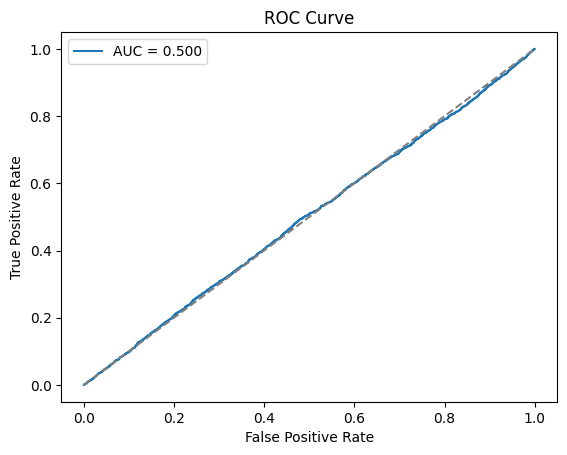

In [70]:
# Opcional: ROC y AUC (si es problema binario)

import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Solo para binaria
if len(np.unique(y_true)) == 2:
    # obtener probabilidades positivas
    if hasattr(modelo, "predict_proba"):
        probs = modelo.predict_proba(X_test_vec)[:,1]
    else:
        # usar decision_function si no hay predict_proba
        probs = modelo.decision_function(X_test_vec)
        probs = (probs - probs.min()) / (probs.max() - probs.min())

    auc = roc_auc_score(y_true, probs)
    fpr, tpr, _ = roc_curve(y_true, probs)
    print("AUC:", auc)
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0,1],[0,1],'--', color='gray')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
else:
    print("No es clasificación binaria: omitiendo ROC/AUC.")


In [73]:
# Evaluate the model using the predictions and the true labels (y_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
...



Ellipsis

In [76]:
X_test_vectorized = vectorizer.transform(X_test)

In [77]:
# Generar las predicciones del modelo
y_pred = modelo.predict(X_test_vectorized)

In [78]:
# Evaluate the model using the predictions and the true labels (y_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

print("===== Métricas de evaluación (Logistic Regression en Test Data) =====")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
print(f"F1-score : {f1_score(y_test, y_pred, average='weighted', zero_division=0):.4f}\n")

# ROC AUC score is only for binary classification and requires probability estimates
try:
    y_prob = modelo.predict_proba(X_test_vectorized)[:, 1]
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}\n")
except AttributeError:
    print("ROC AUC Score not available for this model type.\n")

print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred, zero_division=0))

print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))


===== Métricas de evaluación (Logistic Regression en Test Data) =====
Accuracy : 0.4964
Precision: 0.5063
Recall   : 0.4964
F1-score : 0.4919

ROC AUC Score: 0.5006

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.47      0.60      0.53      4644
           1       0.54      0.40      0.46      5356

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.51      0.50      0.49     10000

Matriz de confusión:
 [[2806 1838]
 [3198 2158]]


🔹 Exactitud (Accuracy): 0.4964

🔹 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.47      0.60      0.53      4644
           1       0.54      0.40      0.46      5356

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.51      0.50      0.49     10000



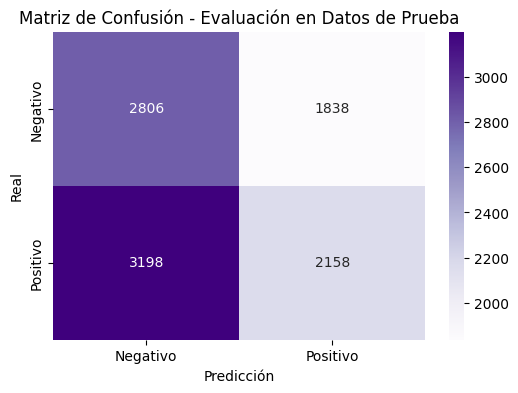

In [85]:
# Predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test_vectorized)

# Métricas de evaluación
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("🔹 Exactitud (Accuracy):", accuracy_score(y_test, y_pred))
print("\n🔹 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Negativo', 'Positivo'],
            yticklabels=['Negativo', 'Positivo'])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Evaluación en Datos de Prueba")
plt.show()

In [86]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.4964
Precision: 0.54004004004004
Recall: 0.4029126213592233
F1 Score: 0.46150556030795553
ROC AUC Score: 0.50356656046428
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.47      0.60      0.53      4644
           1       0.54      0.40      0.46      5356

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.49     10000
weighted avg       0.51      0.50      0.49     10000



**Guardar el modelo**

In [87]:
import joblib

## Librerías Usadas

In [88]:
!pip install watermark

from watermark import watermark

print(watermark(python=True, iversions=True, globals_=globals()))

Python implementation: CPython
Python version       : 3.12.12
IPython version      : 7.34.0

re        : 2.2.1
inflect   : 7.5.0
watermark : 2.5.0
textblob  : 0.19.0
pandas    : 2.2.2
joblib    : 1.5.2
unidecode : 1.4.0
spacy     : 3.8.7
sklearn   : 1.6.1
seaborn   : 0.13.2
numpy     : 2.0.2
matplotlib: 3.10.0



---

## Referencias
- [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)
- [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
- [Classification of text documents using sparse features](https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html)
- Ejemplo de Entrenamiento y selección de Modelo de machine learning entre varios modelos <https://joserzapata.github.io/post/ciencia-datos-proyecto-python/6-model_selection/>
- https://joserzapata.github.io/courses/python-ciencia-datos/python/
- https://joserzapata.github.io/courses/python-ciencia-datos/pandas/
- https://joserzapata.github.io/courses/python-ciencia-datos/machine-learning/

Docente: [Jose R. Zapata](https://joserzapata.github.io)

- [https://joserzapata.github.io/](https://joserzapata.github.io/)
- [https://www.linkedin.com/in/jose-ricardo-zapata-gonzalez/](https://www.linkedin.com/in/jose-ricardo-zapata-gonzalez/)